In [1]:
# Import the necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F

In [2]:
# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [4]:
# Define the network architecture

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                     
                      nn.Dropout(0.4),
                      nn.Linear(256, 128),
                      nn.ReLU(),                    
                      nn.Dropout(0.3),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )



criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-3)

epochs = 30

train_loss = []
test_loss = []

for e in range(epochs):
    running_loss = 0

    for images, labels in trainloader:

        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        pred = model.forward(images)

        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    else:
        loss_test = 0
        accuracy = 0

        with torch.no_grad():

            model.eval()

            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                loss_test += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

    model.train()

    train_loss.append(running_loss/len(trainloader))
    test_loss.append(loss_test/len(testloader))

    print(f'Epoch: {e + 1} | trainloss: {running_loss/len(trainloader)} | test loss: {loss_test/len(testloader)} | accuracy : {accuracy/len(testloader)}' )

Epoch: 1 | trainloss: 0.646574138197055 | test loss: 0.46784505248069763 | accuracy : 0.8301154375076294
Epoch: 2 | trainloss: 0.5142976203039765 | test loss: 0.4312758147716522 | accuracy : 0.8400676846504211
Epoch: 3 | trainloss: 0.4826776952282198 | test loss: 0.4132654070854187 | accuracy : 0.8481289744377136
Epoch: 4 | trainloss: 0.4533648858192379 | test loss: 0.4051879048347473 | accuracy : 0.8514131903648376
Epoch: 5 | trainloss: 0.4450724023555133 | test loss: 0.4087427854537964 | accuracy : 0.8490246534347534
Epoch: 6 | trainloss: 0.43473111433006806 | test loss: 0.391765832901001 | accuracy : 0.8587778806686401
Epoch: 7 | trainloss: 0.43150033172704516 | test loss: 0.39319148659706116 | accuracy : 0.8548964858055115
Epoch: 8 | trainloss: 0.41663109919409763 | test loss: 0.37877199053764343 | accuracy : 0.859574019908905
Epoch: 9 | trainloss: 0.41165156362216865 | test loss: 0.4121748208999634 | accuracy : 0.8531050682067871
Epoch: 10 | trainloss: 0.4140663242765835 | test lo

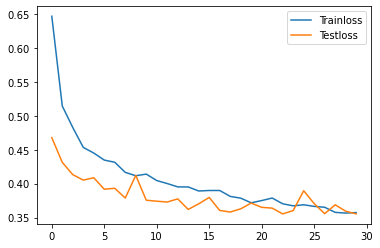

In [5]:
plt.plot(train_loss, label = 'Trainloss')
plt.plot(test_loss, label = 'Testloss')
plt.plot()
plt.legend()
plt.show()

In [6]:
# Define view_classify function
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

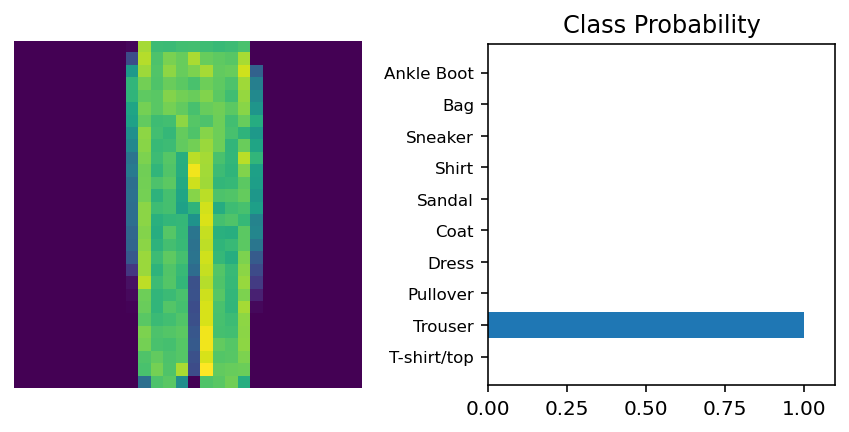

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Testing out the network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilites (log softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilites
view_classify(img, ps, version='Fashion')

In [8]:
print("My model: \n\n", model, "\n")
print("The state dict keys: \n\n", model.state_dict().keys())

My model: 

 Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
) 

The state dict keys: 

 odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [9]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [10]:
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '6.weight', '6.bias', '9.weight', '9.bias'])


In [11]:
# Load the state dict to the network
model.load_state_dict(state_dict)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)
